In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/MyDrive/dataset/veg_fruit_dataset_all.zip .

In [ ]:
!unzip veg_fruit_dataset_all

Streaming output truncated to the last 5000 lines.
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (444).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (445).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (446).JPG  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (447).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (448).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (449).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (45).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (450).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (451).jpg  
  inflating: Fruits_Vegetables_Dataset(12000)/Vegetables/FreshCarrot/freshCarrot (452).jpg  
  inflating: Fruits_

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
train_data_dir = '/content/Fruits_Vegetables_Dataset(12000)/Fruits'

In [ ]:
# validation_data_dir = './fruit_data/valid'

In [ ]:
import tensorflow as tf
from keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mendefinisikan jumlah kelas
num_classes = 10

# Mendefinisikan ukuran gambar input
input_shape = (224, 224, 3)

# Memuat model ResNet sebagai pre-trained model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Membekukan layer base_model agar tidak ikut terupdate saat training
# for layer in base_model.layers:
#     layer.trainable = False

# Membangun model baru berdasarkan VGG16
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Mengompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# Menggunakan ImageDataGenerator untuk melakukan augmentasi data pada dataset training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2,
    rotation_range = 10)

In [ ]:
# Menggunakan ImageDataGenerator tanpa augmentasi pada dataset validation
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Memuat dataset training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    subset='training',
    class_mode='categorical')

Found 4795 images belonging to 10 classes.


In [ ]:
train_generator

In [ ]:
# Memuat dataset validation
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    subset='validation',
    class_mode='categorical')

Found 1193 images belonging to 10 classes.


In [ ]:
# Melakukan proses training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluasi model pada dataset validation
_, accuracy = model.evaluate(validation_generator)
print("Validation Accuracy: %.2f%%" % (accuracy * 100))

Epoch 1/20
149/149 [==============================] - 146s 720ms/step - loss: 3.1632 - accuracy: 0.5201 - val_loss: 3.4926 - val_accuracy: 0.0997
Epoch 2/20
149/149 [==============================] - 98s 655ms/step - loss: 0.6441 - accuracy: 0.8071 - val_loss: 11.0885 - val_accuracy: 0.0988
Epoch 3/20
149/149 [==============================] - 98s 661ms/step - loss: 0.4113 - accuracy: 0.8761 - val_loss: 3.1584 - val_accuracy: 0.1182
Epoch 4/20
149/149 [==============================] - 102s 684ms/step - loss: 0.3558 - accuracy: 0.8967 - val_loss: 7.6250 - val_accuracy: 0.1005
Epoch 5/20
149/149 [==============================] - 103s 689ms/step - loss: 0.4596 - accuracy: 0.8688 - val_loss: 10.3049 - val_accuracy: 0.2280
Epoch 6/20
149/149 [==============================] - 98s 654ms/step - loss: 0.2980 - accuracy: 0.9139 - val_loss: 8.1558 - val_accuracy: 0.1132
Epoch 7/20
149/149 [==============================] - 102s 685ms/step - loss: 0.3293 - accuracy: 0.8957 - val_loss: 1.1403 - 

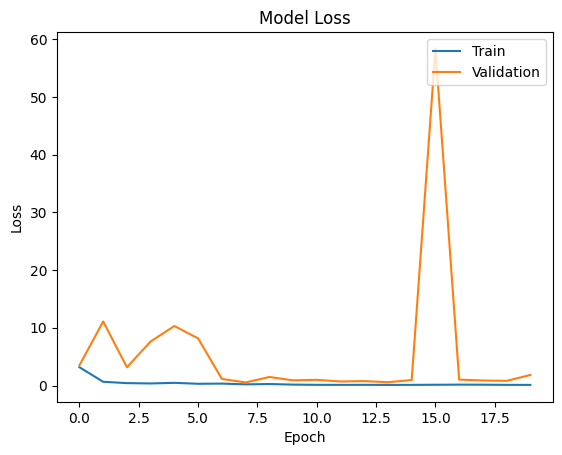

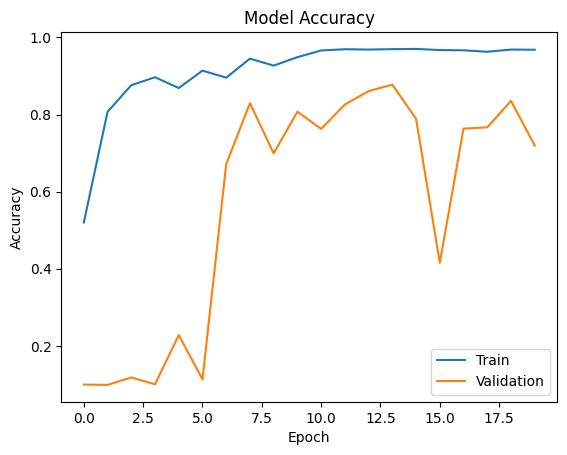

In [ ]:
# Plot kurva loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot kurva akurasi
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()